In [ ]:
%%writefile HW1_20180032_2layer.py
import numpy as np
import random
import matplotlib.pyplot as plt

epochs = 10000
learning_rate = 0.05

# Input data setting
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])

# Weight Setting
W1 = np.random.randn(2,3)
W2 = np.random.randn(3,1)
b1 = np.random.randn(1,3)
b2 = np.random.randn(1,1)

# ------- Activation Function -------#
def sigmoid(x):
    return 1 / (np.exp(-x)+1)

def sigmoid_derivative(x):
    return x * (1 - x)

# --------- Training Step ----------- #
errors = []
for epoch in range(epochs):

    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]

        # Layer에 맞는 Forward Network 구성
        net1 = sigmoid(np.matmul(xin,W1)+b1)
        net2 = sigmoid(np.matmul(net1,W2)+b2)

        # Mean Squared Error (MSE)로 loss 계산
        loss = np.mean((net2 - ans) ** 2)

        # delta matrix initialization
        delta_W1 = np.zeros((2,3))
        delta_W2 = np.zeros((3,1))
        delta_b1 = np.zeros((1,3))
        delta_b2 = np.zeros((1,1))

        # Backpropagation을 통한 Weight의 Gradient calculation(update)
        delta_output = 2 * (net2 - ans) * sigmoid_derivative(net2)
        delta_W2 = np.dot(net1.T, delta_output)
        delta_b2 = np.sum(delta_output)

        delta_hidden = np.dot(delta_output, W2.T) * sigmoid_derivative(net1)
        delta_W1 = np.dot(xin.T, delta_hidden)
        delta_b1 = np.sum(delta_hidden)

        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        W2 = W2 - learning_rate * delta_W2
        b1 = b1 - learning_rate * delta_b1
        b2 = b2 - learning_rate * delta_b2


    ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))

    ## plot을 위해 값 저장
    errors.append(loss)

## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

#--------- Testing Step ------------#
for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]

    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1 = sigmoid(np.matmul(xin,W1)+b1)
    net2 = sigmoid(np.matmul(net1,W2)+b2)

    pred = net2 # ans와 가까울 수록 잘 학습된 것을 의미합니다.

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

#--------- Weight Saving -----------#
np.savetxt("20180032_weight_layer2.txt",(W1, W2, b1, b2), fmt="%s")

Writing HW1_20180032_2layer.py


epoch[0/10000] loss: 0.1641
epoch[500/10000] loss: 0.2406
epoch[1000/10000] loss: 0.2458
epoch[1500/10000] loss: 0.1301
epoch[2000/10000] loss: 0.0567
epoch[2500/10000] loss: 0.0300
epoch[3000/10000] loss: 0.0166
epoch[3500/10000] loss: 0.0102
epoch[4000/10000] loss: 0.0062
epoch[4500/10000] loss: 0.0046
epoch[5000/10000] loss: 0.0058
epoch[5500/10000] loss: 0.0046
epoch[6000/10000] loss: 0.0042
epoch[6500/10000] loss: 0.0034
epoch[7000/10000] loss: 0.0024
epoch[7500/10000] loss: 0.0021
epoch[8000/10000] loss: 0.0026
epoch[8500/10000] loss: 0.0025
epoch[9000/10000] loss: 0.0023
epoch[9500/10000] loss: 0.0014
input:  [0 0] , answer:  0 , pred: 0.0450
input:  [0 1] , answer:  1 , pred: 0.9585
input:  [1 0] , answer:  1 , pred: 0.9632
input:  [1 1] , answer:  0 , pred: 0.0427


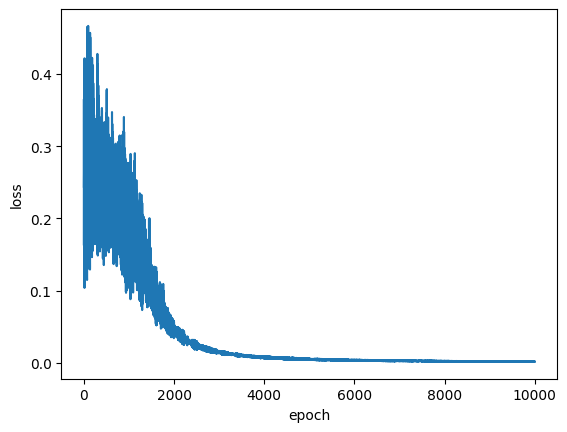

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

epochs = 10000
learning_rate = 0.05

# Input data setting
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])

# Weight Setting
W1 = np.random.randn(2,3)
W2 = np.random.randn(3,1)
b1 = np.random.randn(1,3)
b2 = np.random.randn(1,1)

# ------- Activation Function -------#
def sigmoid(x):
    return 1 / (np.exp(-x)+1)

def sigmoid_derivative(x):
    return x * (1 - x)

# --------- Training Step ----------- #
errors = []
for epoch in range(epochs):

    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]

        # Layer에 맞는 Forward Network 구성
        net1 = sigmoid(np.matmul(xin,W1)+b1)
        net2 = sigmoid(np.matmul(net1,W2)+b2)

        # Mean Squared Error (MSE)로 loss 계산
        loss = np.mean((net2 - ans) ** 2)

        # delta matrix initialization
        delta_W1 = np.zeros((2,3))
        delta_W2 = np.zeros((3,1))
        delta_b1 = np.zeros((1,3))
        delta_b2 = np.zeros((1,1))

        # Backpropagation을 통한 Weight의 Gradient calculation(update)
        delta_output = 2 * (net2 - ans) * sigmoid_derivative(net2)
        delta_W2 = np.dot(net1.T, delta_output)
        delta_b2 = np.sum(delta_output)

        delta_hidden = np.dot(delta_output, W2.T) * sigmoid_derivative(net1)
        delta_W1 = np.dot(xin.T, delta_hidden)
        delta_b1 = np.sum(delta_hidden)

        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        W2 = W2 - learning_rate * delta_W2
        b1 = b1 - learning_rate * delta_b1
        b2 = b2 - learning_rate * delta_b2


    ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))

    ## plot을 위해 값 저장
    errors.append(loss)

## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

#--------- Testing Step ------------#
for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]

    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1 = sigmoid(np.matmul(xin,W1)+b1)
    net2 = sigmoid(np.matmul(net1,W2)+b2)

    pred = net2 # ans와 가까울 수록 잘 학습된 것을 의미합니다.

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

#--------- Weight Saving -----------#
np.savetxt("20180032_weight_layer2.txt",(W1, W2, b1, b2), fmt="%s")

In [ ]:
%%writefile HW1_20180032_1layer.py
import numpy as np
import random
import matplotlib.pyplot as plt

epochs = 10000
learning_rate = 0.05

# Input data setting
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])

# Weight Setting
W1 = np.random.randn(2,1)
b1 = np.random.randn(1,1)

# ------- Activation Function -------#
def sigmoid(x):
    return 1 / (np.exp(-x)+1)

def sigmoid_derivative(x):
    return x * (1 - x)

# --------- Training Step ----------- #
errors = []
for epoch in range(epochs):

    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]

        # Layer에 맞는 Forward Network 구성
        net1 = sigmoid(np.matmul(xin,W1)+b1)

        # Mean Squared Error (MSE)로 loss 계산
        loss = np.mean((net1 - ans) ** 2)

        # delta matrix initialization
        delta_W1 = np.zeros((2,1))
        delta_b1 = np.zeros((1,1))

        # Backpropagation을 통한 Weight의 Gradient calculation(update)
        delta_output = 2 * (net1 - ans) * sigmoid_derivative(net1)
        delta_W1 = np.dot(xin.T, delta_output)
        delta_b1 = np.sum(delta_output)

        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        b1 = b1 - learning_rate * delta_b1

    ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))

    ## plot을 위해 값 저장
    errors.append(loss)

## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

#--------- Testing Step ------------#
for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]

    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1 = sigmoid(np.matmul(xin,W1)+b1)

    pred = net1 # ans와 가까울 수록 잘 학습된 것을 의미합니다.

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

#--------- Weight Saving -----------#
np.savetxt("20180032_weight_layer1.txt",(W1, b1), fmt="%s")

Writing HW1_20180032_1layer.py


epoch[0/10000] loss: 0.3481
epoch[500/10000] loss: 0.1972
epoch[1000/10000] loss: 0.2719
epoch[1500/10000] loss: 0.2158
epoch[2000/10000] loss: 0.2444
epoch[2500/10000] loss: 0.3824
epoch[3000/10000] loss: 0.3354
epoch[3500/10000] loss: 0.3317
epoch[4000/10000] loss: 0.2392
epoch[4500/10000] loss: 0.2730
epoch[5000/10000] loss: 0.2718
epoch[5500/10000] loss: 0.2440
epoch[6000/10000] loss: 0.2578
epoch[6500/10000] loss: 0.2591
epoch[7000/10000] loss: 0.1766
epoch[7500/10000] loss: 0.2552
epoch[8000/10000] loss: 0.2513
epoch[8500/10000] loss: 0.1672
epoch[9000/10000] loss: 0.1989
epoch[9500/10000] loss: 0.1994
input:  [0 0] , answer:  0 , pred: 0.4696
input:  [0 1] , answer:  1 , pred: 0.4971
input:  [1 0] , answer:  1 , pred: 0.4813
input:  [1 1] , answer:  0 , pred: 0.5089


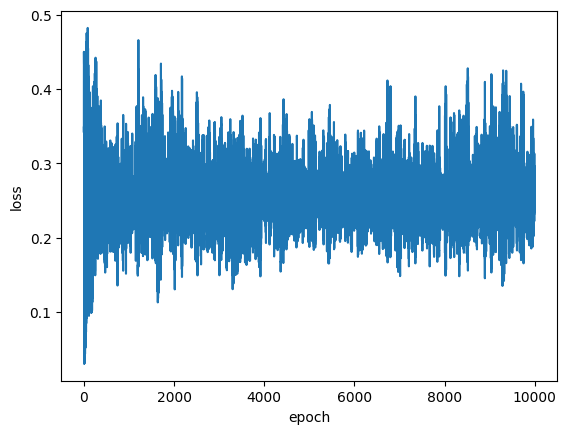

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

epochs = 10000
learning_rate = 0.05

# Input data setting
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])

# Weight Setting
W1 = np.random.randn(2,1)
b1 = np.random.randn(1,1)

# ------- Activation Function -------#
def sigmoid(x):
    return 1 / (np.exp(-x)+1)

def sigmoid_derivative(x):
    return x * (1 - x)

# --------- Training Step ----------- #
errors = []
for epoch in range(epochs):

    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]

        # Layer에 맞는 Forward Network 구성
        net1 = sigmoid(np.matmul(xin,W1)+b1)

        # Mean Squared Error (MSE)로 loss 계산
        loss = np.mean((net1 - ans) ** 2)

        # delta matrix initialization
        delta_W1 = np.zeros((2,1))
        delta_b1 = np.zeros((1,1))

        # Backpropagation을 통한 Weight의 Gradient calculation(update)
        delta_output = 2 * (net1 - ans) * sigmoid_derivative(net1)
        delta_W1 = np.dot(xin.T, delta_output)
        delta_b1 = np.sum(delta_output)

        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        b1 = b1 - learning_rate * delta_b1

    ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))

    ## plot을 위해 값 저장
    errors.append(loss)

## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

#--------- Testing Step ------------#
for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]

    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1 = sigmoid(np.matmul(xin,W1)+b1)

    pred = net1 # ans와 가까울 수록 잘 학습된 것을 의미합니다.

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

#--------- Weight Saving -----------#
np.savetxt("20180032_weight_layer1.txt",(W1, b1), fmt="%s")